In [12]:
# -*- coding: utf-8 -*-
"""
Created on Mon Dec 12 18:47:16 2022

@author: Group 7
"""
 
""" 
Snippet from the previous task: START 
"""
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
from scipy.integrate import odeint
  


In [13]:

def ReactionRates(X,c2,c3,c5):  
        R = np.zeros((6,1))
        R[0] = k[0]
        R[1] = k[1]*X[0]
        R[2] = c2*X[0]*X[2]
        R[3] = c3*X[1]
        R[4] = c4*X[1]
        R[5] = c5*X[2]
        return R[:,0]   
 
def ModelPrediction(t_data,c2,c3,c5): 
    y = odeint(RHS, X.flatten('K'), t_data,  
               args = (c3,c4,c5), tfirst = True) 
    return y[:,2]
  
def RHS(t, X, c2, c3, c5):  
    R = ReactionRates(X, c3, c4, c5)
    dx = np.dot(np.transpose(s), R)
    return dx.flatten('K')


In [14]:

global s, k, X 
s = np.array([[1,0,0],[-1,0,0],[-1,1,-1], 
              [0,-1,0],[0,0,1],[0,0,-1]])
k = [100, 0.1]
c4 = 10
#k2= 0.01, k3 = 1.0, k4 = 10, k5 = 2
X = np.array([k[0]/k[1], 0, 20])
t_data, y_data = np.load('Data.npy')   
  
""" 
Snippet from the previous task: END
"""  
c2_par = [] 
c3_par = [] 
c5_par = [] 
 

In [15]:

#################################
# parameter estimation 30 times #  
# with random start parameters  #
################################# 

for i in range(30):
    popt, pcov = curve_fit(ModelPrediction, t_data, 
                       y_data, bounds=(0,np.inf),
                       p0 = np.random.rand(3))    
     
###########################################
# Collect the inferred optimal parameters #  
###########################################  
    c2_par.append(popt[0]) 
    c3_par.append(popt[1])  
    c5_par.append(popt[2])  
  

In [16]:
# python 3.x
import numpy as np
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
normalized_c2 =scaler.fit_transform(np.array(c2_par).reshape(-1,1)).reshape(1,30)
normalized_c3 =scaler.fit_transform(np.array(c3_par).reshape(-1,1)).reshape(1,30)
normalized_c5 =scaler.fit_transform(np.array(c5_par).reshape(-1,1)).reshape(1,30)

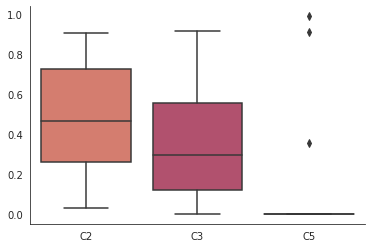

In [17]:
opt = {'C2':c2_par,'C3':c3_par,'C5':c5_par}
data = pd.DataFrame(opt) 
    
sns.set_style('white')
sns.boxplot(data=data, palette='flare')
sns.despine()
plt.show()

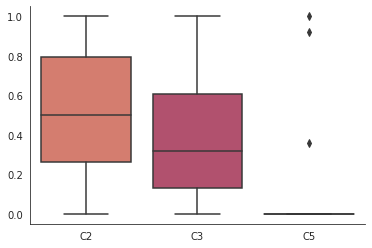

In [18]:
opt = {'C2':normalized_c2[0],'C3':normalized_c3[0],'C5':normalized_c5[0]}
data = pd.DataFrame(opt) 
    
sns.set_style('white')
sns.boxplot(data=data, palette='flare')
sns.despine()
plt.show()

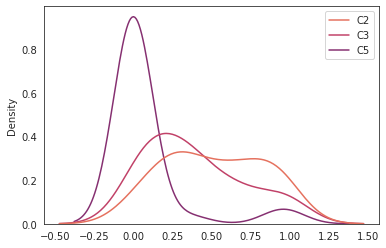

In [19]:
import seaborn as sns
sns.set_style('white')
sns.kdeplot(data=data, palette='flare')